# **Machine Learning - Lab-Project**

---

##### Lab-Project of **Group 5**.

**Members:**
- Ammar Darwich <br>
- Raghad Shakhashiro <br>
- Lukas Jeckle <br>
- Luke Weiss <br>
- Valentin Talmon-l´Armèe <br>

---

## **Prediction of successful Startups**


#### In this Lab-Project we want to take a look at the [Startup-Investments-Crunchbase](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase) Dataset to train a machine learning model for predicting success probabilities for startups.

---

## **1. Imports and Random**

---

#### 1.1 Adding the neccessary imports:

In [1]:
# =======================================================================================================
# Project Imports:
# =======================================================================================================

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from scipy.stats import randint, uniform
from sklearn.utils import resample

# =======================================================================================================
# Additional naive bayes imports:
# =======================================================================================================
import sklearn.naive_bayes as nb

# =======================================================================================================
# Additional DecisionTree specific imports:
# =======================================================================================================
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# =======================================================================================================
# Additional RandomForest specific imports:
# =======================================================================================================
from sklearn.ensemble import RandomForestClassifier

# =======================================================================================================
# Additional ANN specific imports:
# =======================================================================================================
from sklearn.neural_network import MLPClassifier


#### 1.2 Definition of random seed:

In [2]:
# =======================================================================================================
# Defining and setting the random seed:
# =======================================================================================================

RSEED = np.random.seed(42)


#### 1.3 Adjusting global import settings:

In [3]:
# =======================================================================================================
# Adjusting global settings:
# =======================================================================================================

pd.set_option('display.max_columns', None)


## **2. Data Visualization & Preperation**

---

#### 2.1 Importing the data into a dataframe:

In [4]:
# =======================================================================================================
# Importing the data and visualizing the first few samples:
# =======================================================================================================

df = pd.read_csv('data/investments_VC.csv', encoding='latin1')
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2 Cleaning the data:

In [5]:
# =======================================================================================================
# Dropping unnecessary columns:
# =======================================================================================================

df.drop(['name', 'permalink', 'category_list', 'homepage_url', 'state_code', 'city', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1, inplace=True)
df.head()


,market,funding_total_usd,status,country_code,region,funding_rounds,founded_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,News,"17,50,000",acquired,USA,New York City,1.0,2012-06-01,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Games,"40,00,000",operating,USA,Los Angeles,2.0,NaN,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,"40,000",operating,EST,Tallinn,1.0,2012-10-26,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Electronics,"15,00,000",operating,GBR,London,1.0,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tourism,"60,000",operating,USA,Dallas,2.0,2014-01-01,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# =======================================================================================================
# Getting information of the data:
# =======================================================================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    market               45470 non-null  object 
 1    funding_total_usd    49438 non-null  object 
 2   status                48124 non-null  object 
 3   country_code          44165 non-null  object 
 4   region                44165 non-null  object 
 5   funding_rounds        49438 non-null  float64
 6   founded_at            38554 non-null  object 
 7   seed                  49438 non-null  float64
 8   venture               49438 non-null  float64
 9   equity_crowdfunding   49438 non-null  float64
 10  undisclosed           49438 non-null  float64
 11  convertible_note      49438 non-null  float64
 12  debt_financing        49438 non-null  float64
 13  angel                 49438 non-null  float64
 14  grant                 49438 non-null  float64
 15  private_equity     

In [7]:
# =======================================================================================================
# Converting the funding_total_usd column into numeric values
# =======================================================================================================

df[' funding_total_usd '] = df[' funding_total_usd '].astype(str)
df[' funding_total_usd '] = df[' funding_total_usd '].str.replace(',', '')
df[' funding_total_usd '] = df[' funding_total_usd '].str.replace('-', '')
df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '], errors='coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    market               45470 non-null  object 
 1    funding_total_usd    40907 non-null  float64
 2   status                48124 non-null  object 
 3   country_code          44165 non-null  object 
 4   region                44165 non-null  object 
 5   funding_rounds        49438 non-null  float64
 6   founded_at            38554 non-null  object 
 7   seed                  49438 non-null  float64
 8   venture               49438 non-null  float64
 9   equity_crowdfunding   49438 non-null  float64
 10  undisclosed           49438 non-null  float64
 11  convertible_note      49438 non-null  float64
 12  debt_financing        49438 non-null  float64
 13  angel                 49438 non-null  float64
 14  grant                 49438 non-null  float64
 15  private_equity     

In [9]:
# =======================================================================================================
# Extracting the year out of the column founded_at
# =======================================================================================================

df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['founded_at'] = df['founded_at'].dt.year

df.shape


(54294, 20)

In [10]:
# =======================================================================================================
# Drop all status NaN values:
# =======================================================================================================

df.dropna(subset=['status'], inplace=True)


In [11]:
# =======================================================================================================
# Filtering entries before year 1980
# =======================================================================================================

df = df[df['founded_at'] >= 1980]

# Display unique values in a column
unique_values = df['founded_at'].unique()
print("Unique values in the column:")
print(unique_values)


Unique values in the column:
[2012. 2011. 2014. 2007. 2010. 1986. 1984. 2013. 2001. 2008. 2009. 2000.
 2006. 1990. 2004. 2005. 2002. 1998. 2003. 1999. 1997. 1991. 1987. 1989.
 1988. 1993. 1992. 1994. 1995. 1996. 1983. 1985. 1981. 1980. 1982.]


In [12]:
# =======================================================================================================
# Getting information of the data:
# =======================================================================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37206 entries, 0 to 49437
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    market               35456 non-null  object 
 1    funding_total_usd    31086 non-null  float64
 2   status                37206 non-null  object 
 3   country_code          34286 non-null  object 
 4   region                34286 non-null  object 
 5   funding_rounds        37206 non-null  float64
 6   founded_at            37206 non-null  float64
 7   seed                  37206 non-null  float64
 8   venture               37206 non-null  float64
 9   equity_crowdfunding   37206 non-null  float64
 10  undisclosed           37206 non-null  float64
 11  convertible_note      37206 non-null  float64
 12  debt_financing        37206 non-null  float64
 13  angel                 37206 non-null  float64
 14  grant                 37206 non-null  float64
 15  private_equity        37

In [13]:
# =======================================================================================================
# One-Hot Encode column 'market':
# =======================================================================================================

columns_to_encode = [' market ', 'country_code', 'region']

for column in columns_to_encode:
    df_dummies = pd.get_dummies(df[column])
    df = df.join(df_dummies)
    df.drop([column], axis=1, inplace=True)

df.head()


funding_total_usd      status  funding_rounds  founded_at       seed  \
0            1750000.0   acquired             1.0      2012.0  1750000.0   
2              40000.0  operating             1.0      2012.0    40000.0   
3            1500000.0  operating             1.0      2011.0  1500000.0   
4              60000.0  operating             2.0      2014.0        0.0   
7            2000000.0  operating             1.0      2007.0        0.0   

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0        0.0                  0.0          0.0               0.0   
2        0.0                  0.0          0.0               0.0   
3        0.0                  0.0          0.0               0.0   
4        0.0              60000.0          0.0               0.0   
7  2000000.0                  0.0          0.0               0.0   

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0             0.0    0.0    0.0             0.0              0.0   
2             0.0    0.0    0.0             0.0              0.0   
3             0.0    0.0    0.0             0.0              0.0   
4             0.0    0.0    0.0             0.0              0.0   
7             0.0    0.0    0.0             0.0              0.0   

   post_ipo_debt  secondary_market  product_crowdfunding    3D   \
0            0.0               0.0                   0.0  False   
2            0.0               0.0                   0.0  False   
3            0.0               0.0                   0.0  False   
4            0.0               0.0                   0.0  False   
7            0.0               0.0                   0.0  False   

    3D Printing    3D Technology    Accounting    Ad Targeting   \
0          False            False         False           False   
2          False            False         False           False   
3          False            False         False           False   
4          False            False         False           False   
7          False            False         False           False   

    Advanced Materials    Adventure Travel    Advertising   \
0                 False               False          False   
2                 False               False          False   
3                 False               False          False   
4                 False               False          False   
7                 False               False          False   

    Advertising Exchanges    Advertising Networks    Advertising Platforms   \
0                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
7                    False                   False                    False   

    Advice    Aerospace    Agriculture    Algorithms    All Markets   \
0     False        False          False         False          False   
2     False        False          False         False          False   
3     False        False          False         False          False   
4     False        False          False         False          False   
7     False        False          False         False          False   

    All Students    Alternative Medicine    Alumni    Analytics    Android   \
0           False                   False     False        False      False   
2           False                   False     False        False      False   
3           False                   False     False        False      False   
4           False                   False     False        False      False   
7           False                   False     False        False      False   

    Angels    Animal Feed    App Discovery    App Marketing    App Stores   \
0     False          False            False            False         False   
2     False

In [14]:
# =======================================================================================================
# Merging 'operating' and 'aquired' into 'successful' and 'closed' into 'unsuccessful' for binary classes:
# =======================================================================================================

df['status'] = df['status'].replace(['acquired', 'operating'], 'successful')
df['status'] = df['status'].replace(['closed'], 'unsuccessful')

df.head()


funding_total_usd       status  funding_rounds  founded_at       seed  \
0            1750000.0  successful             1.0      2012.0  1750000.0   
2              40000.0  successful             1.0      2012.0    40000.0   
3            1500000.0  successful             1.0      2011.0  1500000.0   
4              60000.0  successful             2.0      2014.0        0.0   
7            2000000.0  successful             1.0      2007.0        0.0   

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0        0.0                  0.0          0.0               0.0   
2        0.0                  0.0          0.0               0.0   
3        0.0                  0.0          0.0               0.0   
4        0.0              60000.0          0.0               0.0   
7  2000000.0                  0.0          0.0               0.0   

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0             0.0    0.0    0.0             0.0              0.0   
2             0.0    0.0    0.0             0.0              0.0   
3             0.0    0.0    0.0             0.0              0.0   
4             0.0    0.0    0.0             0.0              0.0   
7             0.0    0.0    0.0             0.0              0.0   

   post_ipo_debt  secondary_market  product_crowdfunding    3D   \
0            0.0               0.0                   0.0  False   
2            0.0               0.0                   0.0  False   
3            0.0               0.0                   0.0  False   
4            0.0               0.0                   0.0  False   
7            0.0               0.0                   0.0  False   

    3D Printing    3D Technology    Accounting    Ad Targeting   \
0          False            False         False           False   
2          False            False         False           False   
3          False            False         False           False   
4          False            False         False           False   
7          False            False         False           False   

    Advanced Materials    Adventure Travel    Advertising   \
0                 False               False          False   
2                 False               False          False   
3                 False               False          False   
4                 False               False          False   
7                 False               False          False   

    Advertising Exchanges    Advertising Networks    Advertising Platforms   \
0                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
7                    False                   False                    False   

    Advice    Aerospace    Agriculture    Algorithms    All Markets   \
0     False        False          False         False          False   
2     False        False          False         False          False   
3     False        False          False         False          False   
4     False        False          False         False          False   
7     False        False          False         False          False   

    All Students    Alternative Medicine    Alumni    Analytics    Android   \
0           False                   False     False        False      False   
2           False                   False     False        False      False   
3           False                   False     False        False      False   
4           False                   False     False        False      False   
7           False                   False     False        False      False   

    Angels    Animal Feed    App Discovery    App Marketing    App Stores   \
0     False          False            False            False         False   
2    

In [15]:
# =======================================================================================================
# Ordinal Encode columns of type 'object':
# =======================================================================================================

encoder = OrdinalEncoder()

columns_to_encode = df.select_dtypes(include=['object']).columns
for column in columns_to_encode:
    feature = pd.DataFrame(df[column])
    df[column] = encoder.fit_transform(feature)

df.head()


funding_total_usd   status  funding_rounds  founded_at       seed  \
0            1750000.0     0.0             1.0      2012.0  1750000.0   
2              40000.0     0.0             1.0      2012.0    40000.0   
3            1500000.0     0.0             1.0      2011.0  1500000.0   
4              60000.0     0.0             2.0      2014.0        0.0   
7            2000000.0     0.0             1.0      2007.0        0.0   

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0        0.0                  0.0          0.0               0.0   
2        0.0                  0.0          0.0               0.0   
3        0.0                  0.0          0.0               0.0   
4        0.0              60000.0          0.0               0.0   
7  2000000.0                  0.0          0.0               0.0   

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0             0.0    0.0    0.0             0.0              0.0   
2             0.0    0.0    0.0             0.0              0.0   
3             0.0    0.0    0.0             0.0              0.0   
4             0.0    0.0    0.0             0.0              0.0   
7             0.0    0.0    0.0             0.0              0.0   

   post_ipo_debt  secondary_market  product_crowdfunding    3D   \
0            0.0               0.0                   0.0  False   
2            0.0               0.0                   0.0  False   
3            0.0               0.0                   0.0  False   
4            0.0               0.0                   0.0  False   
7            0.0               0.0                   0.0  False   

    3D Printing    3D Technology    Accounting    Ad Targeting   \
0          False            False         False           False   
2          False            False         False           False   
3          False            False         False           False   
4          False            False         False           False   
7          False            False         False           False   

    Advanced Materials    Adventure Travel    Advertising   \
0                 False               False          False   
2                 False               False          False   
3                 False               False          False   
4                 False               False          False   
7                 False               False          False   

    Advertising Exchanges    Advertising Networks    Advertising Platforms   \
0                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
7                    False                   False                    False   

    Advice    Aerospace    Agriculture    Algorithms    All Markets   \
0     False        False          False         False          False   
2     False        False          False         False          False   
3     False        False          False         False          False   
4     False        False          False         False          False   
7     False        False          False         False          False   

    All Students    Alternative Medicine    Alumni    Analytics    Android   \
0           False                   False     False        False      False   
2           False                   False     False        False      False   
3           False                   False     False        False      False   
4           False                   False     False        False      False   
7           False                   False     False        False      False   

    Angels    Animal Feed    App Discovery    App Marketing    App Stores   \
0     False          False            False            False         False   
2     False          False   

In [16]:
# =======================================================================================================
# Cleaning null values:
# =======================================================================================================

print('Before cleaning:')
print(np.isnan(df).sum())
print()

df = df.fillna(0)

print('After cleaning:')
print(np.isnan(df).sum())
print()


Before cleaning:
 funding_total_usd     6120
status                    0
funding_rounds            0
founded_at                0
seed                      0
                       ... 
Zhengzhou                 0
Zhuhai                    0
Zurich                    0
Çan                       0
Évry                      0
Length: 1857, dtype: int64

After cleaning:
 funding_total_usd     0
status                 0
funding_rounds         0
founded_at             0
seed                   0
                      ..
Zhengzhou              0
Zhuhai                 0
Zurich                 0
Çan                    0
Évry                   0
Length: 1857, dtype: int64



#### 2.3 Visualizing the data:

In [17]:
# =======================================================================================================
# Getting a description of the data:
# =======================================================================================================

df.describe()


,funding_total_usd,status,funding_rounds,founded_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
count,3.720600e+04,37206.000000,37206.000000,37206.000000,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04,3.720600e+04
mean,1.355592e+07,0.053405,1.801726,2007.848680,2.474895e+05,8.270328e+06,6.664526e+03,9.842806e+04,2.449184e+04,1.912022e+06,7.363260e+04,8.982600e+04,2.010215e+06,5.225474e+05,2.599786e+05,3.246327e+04,7.834617e+03
std,1.703004e+08,0.224843,1.385007,5.532803,9.568518e+05,3.150805e+07,2.023511e+05,2.323586e+06,1.594193e+06,1.576834e+08,6.113225e+05,3.175218e+06,2.904649e+07,2.876107e+07,2.197475e+07,2.718828e+06,4.847375e+05
min,0.000000e+00,0.000000,1.000000,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.500000e+04,0.000000,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+06,0.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+06,0.000000,2.000000,2012.000000,5.000000e+04,5.100000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,1.000000,18.000000,2014.000000,1.000000e+08,2.351000e+09,2.500000e+07,2.508000e+08,3.000000e+08,3.007950e+10,4.392386e+07,4.000000e+08,2.600000e+09,4.700000e+09,3.500000e+09,4.000000e+08,7.200000e+07


In [18]:
# =======================================================================================================
# Getting the amounts of unique entries for each column (sorted):
# =======================================================================================================

print('Unsorted:')
for column in df.columns:
    if (len(df[column].unique()) > 2):
        print(f'Column "{column}" has - {len(df[column].unique())} - unique values.')

pairs = {}
count = 0

for column in df.columns:
    pairs[column] = len(df[column].unique())
    count = count + 1

print()
print('Sorted:')
for key_name in sorted(pairs, key=pairs.get, reverse=True):
    if (pairs[key_name] > 2):
        print(f'Column "{key_name}" has - {pairs[key_name]} - unique values.')


Unsorted:
Column " funding_total_usd " has - 11560 - unique values.
Column "funding_rounds" has - 17 - unique values.
Column "founded_at" has - 35 - unique values.
Column "seed" has - 2897 - unique values.
Column "venture" has - 7202 - unique values.
Column "equity_crowdfunding" has - 222 - unique values.
Column "undisclosed" has - 442 - unique values.
Column "convertible_note" has - 265 - unique values.
Column "debt_financing" has - 1509 - unique values.
Column "angel" has - 903 - unique values.
Column "grant" has - 408 - unique values.
Column "private_equity" has - 690 - unique values.
Column "post_ipo_equity" has - 139 - unique values.
Column "post_ipo_debt" has - 34 - unique values.
Column "secondary_market" has - 16 - unique values.
Column "product_crowdfunding" has - 142 - unique values.

Sorted:
Column " funding_total_usd " has - 11560 - unique values.
Column "venture" has - 7202 - unique values.
Column "seed" has - 2897 - unique values.
Column "debt_financing" has - 1509 - uniq

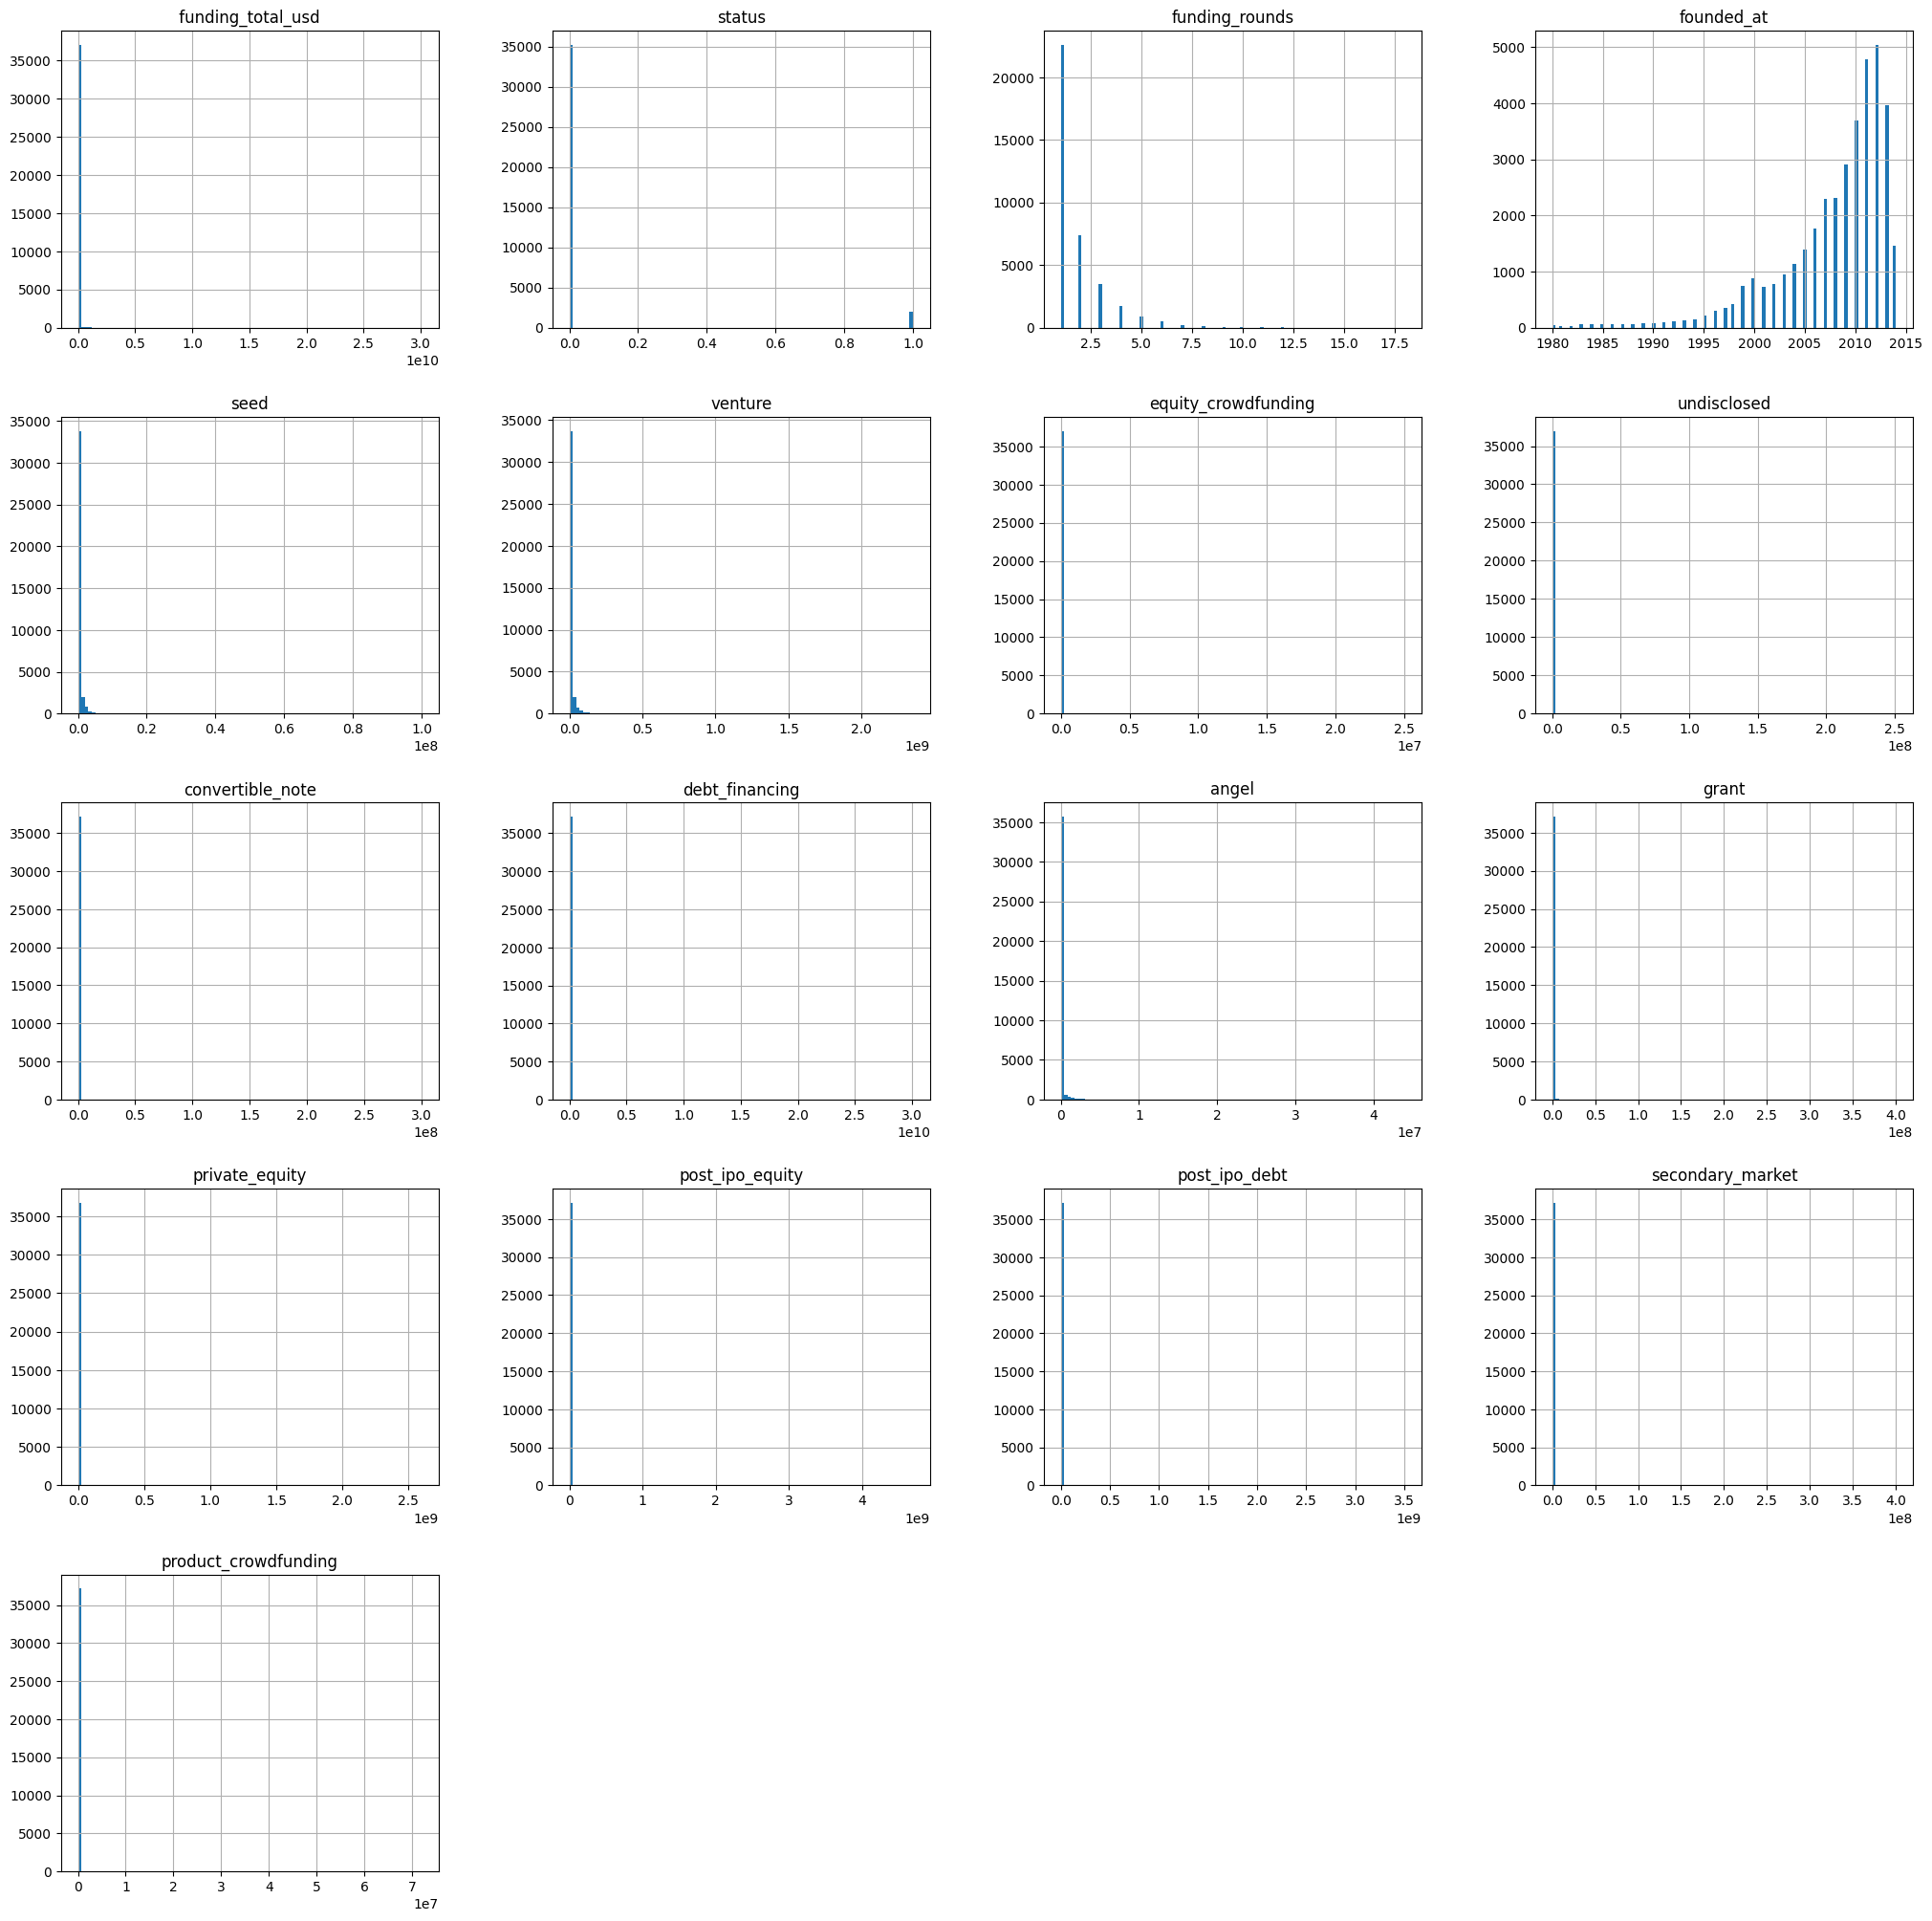

In [19]:
# =======================================================================================================
# Plotting Histograms to visualize the data distribution:
# =======================================================================================================

ax = df.hist(figsize=(25,25), bins=100)
plt.show()


In [20]:
# =======================================================================================================
# Display cleaned DataFrame head:
# =======================================================================================================

df.head()


funding_total_usd   status  funding_rounds  founded_at       seed  \
0            1750000.0     0.0             1.0      2012.0  1750000.0   
2              40000.0     0.0             1.0      2012.0    40000.0   
3            1500000.0     0.0             1.0      2011.0  1500000.0   
4              60000.0     0.0             2.0      2014.0        0.0   
7            2000000.0     0.0             1.0      2007.0        0.0   

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0        0.0                  0.0          0.0               0.0   
2        0.0                  0.0          0.0               0.0   
3        0.0                  0.0          0.0               0.0   
4        0.0              60000.0          0.0               0.0   
7  2000000.0                  0.0          0.0               0.0   

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0             0.0    0.0    0.0             0.0              0.0   
2             0.0    0.0    0.0             0.0              0.0   
3             0.0    0.0    0.0             0.0              0.0   
4             0.0    0.0    0.0             0.0              0.0   
7             0.0    0.0    0.0             0.0              0.0   

   post_ipo_debt  secondary_market  product_crowdfunding    3D   \
0            0.0               0.0                   0.0  False   
2            0.0               0.0                   0.0  False   
3            0.0               0.0                   0.0  False   
4            0.0               0.0                   0.0  False   
7            0.0               0.0                   0.0  False   

    3D Printing    3D Technology    Accounting    Ad Targeting   \
0          False            False         False           False   
2          False            False         False           False   
3          False            False         False           False   
4          False            False         False           False   
7          False            False         False           False   

    Advanced Materials    Adventure Travel    Advertising   \
0                 False               False          False   
2                 False               False          False   
3                 False               False          False   
4                 False               False          False   
7                 False               False          False   

    Advertising Exchanges    Advertising Networks    Advertising Platforms   \
0                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
7                    False                   False                    False   

    Advice    Aerospace    Agriculture    Algorithms    All Markets   \
0     False        False          False         False          False   
2     False        False          False         False          False   
3     False        False          False         False          False   
4     False        False          False         False          False   
7     False        False          False         False          False   

    All Students    Alternative Medicine    Alumni    Analytics    Android   \
0           False                   False     False        False      False   
2           False                   False     False        False      False   
3           False                   False     False        False      False   
4           False                   False     False        False      False   
7           False                   False     False        False      False   

    Angels    Animal Feed    App Discovery    App Marketing    App Stores   \
0     False          False            False            False         False   
2     False          False   

In [23]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Create X (feature set) and y (target variable).
X = df.copy(deep=True)
y = X.pop('status')

# Balance the data.
data_class_0   = df[df['status'] == 0]
data_class_1   = df[df['status'] == 1]

max_size = len(data_class_0)

data_class_1_upsampled = resample(data_class_1, replace=True, n_samples=max_size, random_state=RSEED)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled])

df = balanced_data.copy(deep=True)

print('Class distribution:')
print(f'{df['status'].value_counts()}')


35219
Class distribution:
status
0.0    35219
1.0    35219
Name: count, dtype: int64


# 3. Creating the first Classifier (Naive Bayes)

In [22]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================


df_nb = df.copy(deep=True)


# Balance the data.
data_class_0   = df_nb[df_nb['status'] == 0]
data_class_1   = df_nb[df_nb['status'] == 1]
data_class_2   = df_nb[df_nb['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
data_class_2_downsampled = resample(data_class_2, replace=False, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_downsampled])

X_balanced = balanced_data.copy(deep=True)
y_balanced = X_balanced.pop('status')

#y=df_nb.pop("status")
#X_enc=df_nb

y=y_balanced
X_enc=X_balanced

x_train, x_test,y_train, y_test = train_test_split(X_enc,y,random_state=0,test_size=0.3,train_size=0.7, shuffle=True, stratify=y)


ValueError: Cannot sample 35219 out of arrays with dim 0 when replace is False

In [ ]:
model = nb.BernoulliNB(alpha=0.0035564803062231283) # set alpha to good value; default=1.0 is not working great. (if you want to try..)
model.fit(x_train, y_train) 

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
fail = y_test[y_test!=y_pred] 
print(fail.head(3))
print("\ntotal mispredictions: "+str(fail.shape[0]))
#print(fail.replace({0:"aquired",1:"closed",2:"operating"}).value_counts()) 
print(fail.value_counts()) 

In [ ]:

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# 4. Creating the second Classifier (Decision Trees)

In [ ]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_dt = df.copy(deep=True)
df_dt.head()
df_dt.drop(['name','funding_rounds','undisclosed'], axis=1, inplace=True)


In [ ]:
# df_dt = df_dt[df_dt['founded_at'] >= 1980]

# # Display unique values in a column
# unique_values = df_dt['founded_at'].unique()
# print("Unique values in the column:")
# print(unique_values)

In [ ]:
df_dt['status'] = df_dt['status'].apply(lambda x: 0 if x == 2 or x == 0 else 1)
counts = df_dt['status'].value_counts()
print(counts)
df_dt.head()

In [ ]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Balance the data.
data_class_0   = df_dt[df_dt['status'] == 0]
data_class_1   = df_dt[df_dt['status'] == 1]
data_class_2   = df_dt[df_dt['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled])

#Created seperated feature set (X_dt) and target set (y_dt)
X_dt = balanced_data.copy(deep=True)
X_dt = X_dt.drop(columns=['status'], errors = 'ignore')
y_dt = balanced_data['status']


# Create Train and Test splits.
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.20, stratify=y_dt, random_state=1)

In [ ]:
counts = y_dt.value_counts()
print(counts)
balanced_data.head()

In [ ]:
# =======================================================================================================
# Train with Prunning, max_depth = 3
# =======================================================================================================
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
dt_clf.fit(X_train_dt, y_train_dt)

In [ ]:
# =======================================================================================================
# Test
# =======================================================================================================
y_pred_dt = dt_clf.predict(X_test_dt)
dt_accuracy = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy after pruning: {dt_accuracy:.5f}")

In [ ]:
imp = dt_clf.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X_train_dt.columns,
    'Importance': imp
    }).sort_values(by='Importance', ascending=False)

print(feature_imp)

In [ ]:
# =======================================================================================================
# Plot confusion matrix:
# =======================================================================================================

cm = confusion_matrix(y_test_dt, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test_dt)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [ ]:
# =======================================================================================================
# Visualize the Decision Tree:
# =======================================================================================================
plt.figure(figsize=(25, 15))
plot_tree(dt_clf, feature_names=X_train_dt.columns, class_names=['Successful', 'Failed'], filled=True)
plt.title("Pruned Decision Tree")
plt.show()

In [ ]:
print(classification_report(y_test_dt,y_pred_dt, zero_division=0))

# 5. Creating the third Classifier (Random Forest)

In [ ]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_rf = df.copy(deep=True)
df_rf.head()
df_rf.drop(['name','funding_rounds','undisclosed'], axis=1, inplace=True)



In [ ]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================


# Balance the data.
data_class_0   = df_rf[df_rf['status'] == 0]
data_class_1   = df_rf[df_rf['status'] == 1]
data_class_2   = df_rf[df_rf['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
data_class_2_downsampled = resample(data_class_2, replace=False, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_downsampled])

# Create X (feature set) and y (target variable).
X_rf = balanced_data.copy(deep=True)
X_rf = X_rf.drop(columns=['status'], errors = 'ignore')
y_rf = balanced_data['status']

# Create Train and Test splits.
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.20, stratify=y_rf, random_state=1)

In [ ]:
# =======================================================================================================
# Creating the Model
# =======================================================================================================

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10000, 
                                max_samples=None, # or 1.0 -> use sample size same as dataset size
                                max_features='sqrt', # rule of thumb, here 3.
                                max_depth=3,
                                random_state=1,                                
                                n_jobs=-1)
forest.fit(X_train_rf, y_train_rf)

y_pred_rf = forest.predict(X_test_rf)
accuracy_score(y_test_rf,y_pred_rf)

In [ ]:
# =======================================================================================================
# Plot confusion matrix:
# =======================================================================================================

cm = confusion_matrix(y_test_rf, y_pred_rf)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test_rf)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [ ]:
# =======================================================================================================
# Trying to tune the Parameters
# =======================================================================================================

# for this you need to be patient ... if you are not, remove some values, e.g. the estimators 250 and 500. 
param_grid = {'n_estimators': np.array([25, 50, 100, 250, 500,1000]), 
              'criterion':['gini','entropy'],
              'min_samples_leaf':[3,5,10],
              'max_depth': [1,2,3,4]}

forest = RandomForestClassifier(max_features='sqrt',
                                random_state=1,                                
                                n_jobs=-1)

forest_cv = GridSearchCV(forest, param_grid, scoring='accuracy', cv=10, verbose=3, n_jobs=-1, refit=True) #refit important.
forest_cv.fit(X_train_rf, y_train_rf)

print (forest_cv.best_estimator_)

y_pred_rf = forest_cv.best_estimator_.predict(X_test_rf)
accuracy_score(y_test_rf,y_pred_rf)

In [ ]:
# =======================================================================================================
# New copy for data for RF with binary Classes
# =======================================================================================================

df_rf2 = df.copy(deep=True)

df_rf2['status'] = df_dt['status'].apply(lambda x: 0 if x == 2 or x == 0 else 1)
counts = df_rf2['status'].value_counts()
print(counts)
df_rf2.head()

In [ ]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Balance the data.
data_class_0   = df_rf2[df_rf2['status'] == 0]
data_class_1   = df_rf2[df_rf2['status'] == 1]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
balanced_data_rf = pd.concat([data_class_0, data_class_1_upsampled])

#Created seperated feature set (X_dt) and target set (y_dt)
X_rf2 = balanced_data_rf.copy(deep=True)
X_rf2 = X_rf2.drop(columns=['status'], errors = 'ignore')
y_rf2 = balanced_data_rf['status']


# Create Train and Test splits.
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_rf2, y_rf2, test_size=0.20, stratify=y_rf2, random_state=1)

In [ ]:
# =======================================================================================================
# Create RF Model with binary Classes
# =======================================================================================================
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=500, 
                                max_samples=None, # or 1.0 -> use sample size same as dataset size
                                max_features='sqrt', # rule of thumb, here 3.
                                max_depth=3,
                                random_state=1,                                
                                n_jobs=-1)
forest.fit(X_train_rf2, y_train_rf2)

y_pred_rf2 = forest.predict(X_test_rf2)
accuracy_score(y_test_rf2,y_pred_rf2)

In [ ]:
# =======================================================================================================
# Plot confusion matrix:
# =======================================================================================================

cm = confusion_matrix(y_test_rf2, y_pred_rf2)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test_rf2)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# 6. Creating the fourth Classifier (ANN)

## 6.1. ANN Classifier ('successful', 'unsuccessful')

In [24]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_nn = df.copy(deep=True)
df_nn.head()


funding_total_usd   status  funding_rounds  founded_at       seed  \
0            1750000.0     0.0             1.0      2012.0  1750000.0   
2              40000.0     0.0             1.0      2012.0    40000.0   
3            1500000.0     0.0             1.0      2011.0  1500000.0   
4              60000.0     0.0             2.0      2014.0        0.0   
7            2000000.0     0.0             1.0      2007.0        0.0   

     venture  equity_crowdfunding  undisclosed  convertible_note  \
0        0.0                  0.0          0.0               0.0   
2        0.0                  0.0          0.0               0.0   
3        0.0                  0.0          0.0               0.0   
4        0.0              60000.0          0.0               0.0   
7  2000000.0                  0.0          0.0               0.0   

   debt_financing  angel  grant  private_equity  post_ipo_equity  \
0             0.0    0.0    0.0             0.0              0.0   
2             0.0    0.0    0.0             0.0              0.0   
3             0.0    0.0    0.0             0.0              0.0   
4             0.0    0.0    0.0             0.0              0.0   
7             0.0    0.0    0.0             0.0              0.0   

   post_ipo_debt  secondary_market  product_crowdfunding    3D   \
0            0.0               0.0                   0.0  False   
2            0.0               0.0                   0.0  False   
3            0.0               0.0                   0.0  False   
4            0.0               0.0                   0.0  False   
7            0.0               0.0                   0.0  False   

    3D Printing    3D Technology    Accounting    Ad Targeting   \
0          False            False         False           False   
2          False            False         False           False   
3          False            False         False           False   
4          False            False         False           False   
7          False            False         False           False   

    Advanced Materials    Adventure Travel    Advertising   \
0                 False               False          False   
2                 False               False          False   
3                 False               False          False   
4                 False               False          False   
7                 False               False          False   

    Advertising Exchanges    Advertising Networks    Advertising Platforms   \
0                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
7                    False                   False                    False   

    Advice    Aerospace    Agriculture    Algorithms    All Markets   \
0     False        False          False         False          False   
2     False        False          False         False          False   
3     False        False          False         False          False   
4     False        False          False         False          False   
7     False        False          False         False          False   

    All Students    Alternative Medicine    Alumni    Analytics    Android   \
0           False                   False     False        False      False   
2           False                   False     False        False      False   
3           False                   False     False        False      False   
4           False                   False     False        False      False   
7           False                   False     False        False      False   

    Angels    Animal Feed    App Discovery    App Marketing    App Stores   \
0     False          False            False            False         False   
2     False          False   

In [25]:
# =======================================================================================================
# Print the shape of the DataFrame:
# =======================================================================================================

df.shape


(70438, 1857)

In [29]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Create X (feature set) and y (target variable).
X_nn = df_nn.copy(deep=True)
y_nn = X_nn.pop('status')

# Create Train and Test splits.
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.20, stratify=y_nn, random_state=RSEED)

print('Sample distribution:')
print(f'Train: \t {len(y_train_nn)}')
print(f'Test: \t {len(y_test_nn)}')


Sample distribution:
Train: 	 56350
Test: 	 14088


In [30]:
# =======================================================================================================
# Create results DataFrame:
# =======================================================================================================

results = pd.DataFrame.from_records([], columns=['hidden_layer_neurons','activation_function','batch_size','early_stopping','learningRate','alpha','time','epochs','acc_train','acc_test'])
results


,hidden_layer_neurons,activation_function,batch_size,early_stopping,learningRate,alpha,time,epochs,acc_train,acc_test


In [31]:
# =======================================================================================================
# Create lists to hold different classifiers, classifier results and their parameters.
# =======================================================================================================

classifier_list = []
pred_test_results_list = []
model_params = []


In [38]:
# =======================================================================================================
# Hyperparameter tuning: 
# =======================================================================================================

ITERATIONS = 3

distributions = {
    'hidden_layer_sizes': [(32, 25), (32, 64), (64, 25), (64, 64), (128, 25), (128, 64), (128, 128)],
    'activation': ['logistic', 'relu', 'tanh'],
    'batch_size': [50, 100, 150, 'auto', 250],
    'learning_rate': ['constant'],
    'learning_rate_init': uniform(0.0001, 0.01),
    'alpha': uniform(0.0001, 0.01),
    'max_iter': [2000],
    'early_stopping': [True],
    'solver': ['adam'],
}

for i in range(ITERATIONS):

    # Using RandomizedGridSearch to find good hyperparameters.
    random_search = RandomizedSearchCV(MLPClassifier(), distributions, n_iter=4, verbose=2, cv=2, random_state=i)
    start_time_search = dt.datetime.now()
    search = random_search.fit(X_train_nn, y_train_nn)
    end_time_search = dt.datetime.now()
    training_time_search = str(end_time_search - start_time_search)[:7]
    print(f'Search-Loop - {i+1} - finished in - {training_time_search} - and found the following parameters: \n')
    print(f'{search.best_params_} \n')

    # Append params to model_params list.
    model_params.append(search.best_params_)
    
    # Training new Classifier with those results.
    print(f'Beginning to train the Classifier based on the found parameters!\n')
    mlp_tuned = MLPClassifier(**search.best_params_)

    # Start time measurement.
    start_time = dt.datetime.now()

    # Perform the learning
    mlp_tuned.fit(X_test_nn, y_test_nn)

    # Stop time measurement.
    end_time = dt.datetime.now()

    # Calculate the time delta and format it.
    training_time = str(end_time - start_time)[:7]

    # Predict Train and Test results.
    pred_train_mlp_tuned = mlp_tuned.predict(X_train_nn)
    pred_test_mlp_tuned = mlp_tuned.predict(X_test_nn)
    train_result = accuracy_score(pred_train_mlp_tuned, y_train_nn)
    test_result = accuracy_score(pred_test_mlp_tuned, y_test_nn)
    
    # Printing results.
    print(f'Training Accuracy: {train_result}')
    print(f'Testing Accuracy: {test_result}')
    print()
    
    # Add classifier and test predictions to lists.
    classifier_list.append(mlp_tuned)
    pred_test_results_list.append(pred_test_mlp_tuned)
    
    # Create DataFrame entry
    entry = pd.DataFrame({
        'hidden_layer_neurons': [mlp_tuned.hidden_layer_sizes],
        'activation_function': [mlp_tuned.activation],
        'batch_size': [mlp_tuned.batch_size],
        'early_stopping': [mlp_tuned.early_stopping],
        'learningRate': [mlp_tuned.learning_rate_init],
        'alpha': [mlp_tuned.alpha],
        'time': [training_time],
        'epochs': [mlp_tuned.n_iter_],
        'acc_train': [train_result], 
        'acc_test': [test_result]
    })

    # Add entry to results
    results = pd.concat([results, entry], ignore_index=True) if not results.empty else entry

results


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END activation=logistic, alpha=0.0060284461822501835, batch_size=50, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, learning_rate_init=0.008679456176227568, max_iter=2000, solver=adam; total time= 1.2min
[CV] END activation=logistic, alpha=0.0060284461822501835, batch_size=50, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate=constant, learning_rate_init=0.008679456176227568, max_iter=2000, solver=adam; total time=  51.5s
[CV] END activation=relu, alpha=0.006335636967859724, batch_size=150, early_stopping=True, hidden_layer_sizes=(128, 25), learning_rate=constant, learning_rate_init=0.0030753460654447226, max_iter=2000, solver=adam; total time= 1.9min
[CV] END activation=relu, alpha=0.006335636967859724, batch_size=150, early_stopping=True, hidden_layer_sizes=(128, 25), learning_rate=constant, learning_rate_init=0.0030753460654447226, max_iter=2000, solver=adam; total time= 3.5min
[

,hidden_layer_neurons,activation_function,batch_size,early_stopping,learningRate,alpha,time,epochs,acc_train,acc_test
0,"(128, 25)",relu,150,True,0.003075,0.006336,0:00:58,17,0.592192,0.600369
1,"(128, 25)",relu,150,True,0.002145,0.005488,0:02:36,46,0.596256,0.603350
2,"(128, 64)",tanh,250,True,0.006930,0.006427,0:00:40,12,0.549814,0.554089


In [39]:
# ======================================================================================================= 
# Get the best performing classifier from the results list:
# =======================================================================================================

best_classifier_index = results['acc_test'].idxmax()

best_model = classifier_list[best_classifier_index]
y_test_pred = pred_test_results_list[best_classifier_index]


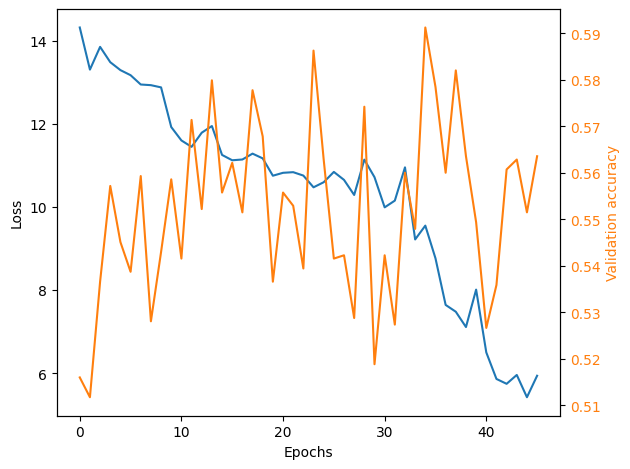

In [43]:
# =======================================================================================================
# Plot loss and accuracy:
# =======================================================================================================

loss_values = best_model.loss_curve_

fig, ax1 = plt.subplots() 

ax1.plot(range(len(loss_values)), loss_values)
ax1.set_ylabel('Loss')
plt.xlabel('Epochs')

color = 'tab:orange'
ax2 = ax1.twinx()
ax2.plot(range(len(best_model.validation_scores_)), best_model.validation_scores_, color)
ax2.set_ylabel('Validation accuracy', color=color)
ax2.tick_params(axis ='y', labelcolor = color) 
plt.tight_layout()
plt.show()


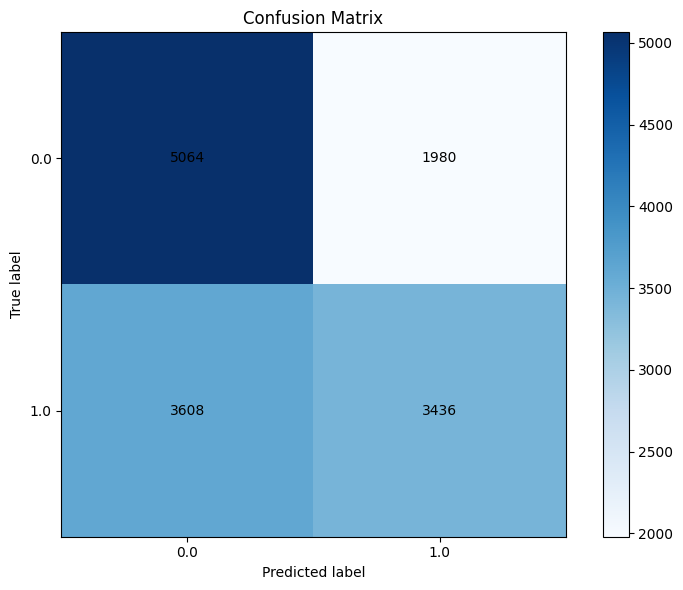

In [44]:
# =======================================================================================================
# Plot confusion matrix:
# =======================================================================================================

cm = confusion_matrix(y_test_nn, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test_nn)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


In [45]:
# =======================================================================================================
# Print Classification Report:
# =======================================================================================================

print(classification_report(y_test_nn, y_test_pred, zero_division=0))


              precision    recall  f1-score   support

         0.0       0.58      0.72      0.64      7044
         1.0       0.63      0.49      0.55      7044

    accuracy                           0.60     14088
   macro avg       0.61      0.60      0.60     14088
weighted avg       0.61      0.60      0.60     14088



# 7. Conclusion